<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangtgao/DS-UA_201-Causal-Inference-Spring-2025/blob/main/labs/4-Statistics_and_Experiments.ipynb)

</div>





$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE}\\\\
\textbf{Zichao Zhang} \\
\textit{Center for Data Science, New York University} \\\\
\textit{September 26, 2025}\\\\\\
\text{Materials prepared by: Daniela Pinto Veizaga, Xiang Pan, Xiang Gao, and Zichao Zhang}
\end{array}
$$

---

# Hypothesis testing and Introduction to Experiments

## Goals for today

- Review hypothesis testing.
- A final review of Statistics.
- Experiments, an introduction.


## Hypothesis Testing


Hypothesis testing is a fundamental tool in statistics and causal inference. It helps us make decisions about populations using sample data. In causal inference, we often want to decide if some effect or difference is real or just due to random chance.

### Key Concepts

1. **Null Hypothesis ($H_0$)**:  
    This is the default claim we start with – often a statement that there is “no effect” or no difference. We assume $H_0$ is true unless the data strongly suggest otherwise. For example, in a medical trial, it might state that a new treatment has no effect.

2. **Alternative Hypothesis ($H_1$)**:  
   This is what we suspect or hope might be true instead. It’s a statement that there is an effect or a difference. Using the same example, $H_1$ might claim that the new drug does have an effect (perhaps improves outcomes). 

3. **Test Statistic ($T_n$)**:  
   A number calculated from the sample data that measures how far the data depart from what we’d expect if $H_0$ were true. It often looks like a standardized difference. For instance, a common test statistic is the z-score or t-score of the sample mean relative to $H_0$. Intuitively, the bigger the test statistic, the more the data differ from $H_0$’s expectations, and thus the more evidence against $H_0$.

4. **Critical Value ($c$)**:  
   This is a threshold we compare our test statistic to. It comes from the sampling distribution under $H_0$ (often a normal or t-distribution cutoff). We choose $c$ based on a significance level $\alpha$ (more on $\alpha$ next). If our test statistic exceeds this critical value (i.e., falls in the extreme tail of the distribution under $H_0$), then the result is considered statistically significant.

5. **Decision Rule**:  
   Finally, we make a decision.
	•	If the test statistic is greater than the critical value (or otherwise falls in the rejection region), we reject $H_0$ in favor of $H_1$.
	•	If the test statistic is below the critical value (not extreme enough), we fail to reject $H_0$. Importantly, “fail to reject” is not the same as “accepting $H_0$ as true.” It simply means we don’t have enough evidence to say $H_0$ is false. There still might be an effect, but our sample didn’t demonstrate it convincingly.

> **Significance** ($\alpha$) and **P-Value**: A result is considered **significant** if the evidence against $H_0$ is strong. The **p-value** measures this evidence. It indicates the probability of observing data as extreme as ours if $H_0$ were true. A low p-value (typically < 0.05) suggests strong evidence against $H_0$.


Now, let's apply our hypothesis testing framework by simulating a dataset and examining the results.

#### a) Simulate a Dataset
We simulate a sample of size 1000 drawn from a normal distribution $X \sim N(5,,1.5)$, meaning the true population mean is 5 and the true standard deviation is 1.5.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from IPython.display import display, Math

In [103]:
np.random.seed(42)
mu, sigma= 5.0, 1.5
sample = np.random.normal(loc=mu, scale=sigma, size=1000)

In [104]:
sample[:10]

array([5.74507123, 4.79260355, 5.97153281, 7.28454478, 4.64876994,
       4.64879456, 7.36881922, 6.15115209, 4.29578842, 5.81384007])

In [105]:
n = len(sample)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

#### Define our hypothesis

Our null hypothesis ($H_0$) states that the population mean is equal to 8. The alternative hypothesis ($H_1$) suggests that the mean is different from this value. Formally, we set up:





$$H_0: \mathbb{E}[X] =8, \quad H_1: \mathbb{E}[X] \neq 8.$$



This is a two-sided alternative since we’re open to the true mean being either less than or greater than 8 – just different from 8 in either direction.

It might seem obvious our sample mean will be nowhere near 8 (because we drew from a distribution with mean 5), but the point is to go through the formal testing procedure.

In [106]:
mu_0=8

####  Set a significance level $\alpha$


Next, we choose a significance level $\alpha$. This is the threshold for how much risk of a false alarm we’re willing to take.

Common choices are $\alpha = 0.05$ (5%) or $\alpha = 0.01$ (1%). Let’s use $\mathbf{0.05}$ for this example. That means:

	•	If the null hypothesis is actually true, we’re allowing a 5% chance that we mistakenly reject it due to random sample fluctuation (a 5% Type I error rate).

We set alpha = 0.05 in the code. This will be used to determine our critical value and to interpret the p-value.

In [107]:
# Significance level
alpha=0.05

#### d) Compute $T_n$

To quantitatively assess whether our sample provides enough evidence to reject $H_0$, we use the t-test statistic:

$$T_n = \frac{\sqrt{n}}{\hat{\sigma}_n} \left( |\overline{X_n} - \mu_0| \right).$$

$T_n$ measures how far our sample mean ($\overline{X_n}$) is from the hypothesized mean ($\mu_0$). The larger the value of $T_n$, the more evidence we have against the null hypothesis ($H_0$).

Because $n$ is large (1000), by the Central Limit Theorem the sample mean $\overline{X}_n$ is approximately normally distributed around the true mean. If $H_0$ were true (true mean 8), then $T_n$ would roughly follow a standard normal $N(0,1)$. This justifies comparing $T_n$ to normal distribution cutoffs.


In [108]:
def compute_test_statistic(sample_mean, sample_std, mu_0):
    T_n = np.sqrt(n) * abs(sample_mean - mu_0) / sample_std
    return T_n

Let’s see what the code got

In [109]:
T_n = compute_test_statistic(sample_mean, sample_std, mu_0)
display(Math(f"T_n: {T_n}"))

<IPython.core.display.Math object>

It indeed computed something like $T_n \approx 63.99$ (around 64). That’s an enormous value for a test statistic!

What does such a large $T_n$ mean? It means our sample mean is about 64 standard deviations away from 8. In other words, if the true mean were 8, getting a sample mean around 5 (which is 3 units away) is basically impossible under normal randomness. This already hints that $H_0: \mu=8$ is completely inconsistent with our data.

(Quick note: Usually we wouldn’t test something this far-fetched; this is a teaching example to illustrate an obvious rejection scenario. We’ll also see a more borderline example later.)

#### Define the critical value $c$

Next, let’s formalize the decision by finding the critical value for our test at $\alpha = 0.05$. For a two-sided test at $\alpha=0.05$, we typically split the alpha into two tails (2.5% in each tail). So our critical z-value is about 1.96.

In [110]:
critical_value = stats.norm.ppf(1 - alpha / 2)
display(Math(f"\\text{{For }} \\alpha = {alpha}, \\text{{the critical value}} \, c \,\\text{{is}} \, {round(critical_value, 2)}"))


<IPython.core.display.Math object>

#### $p_n$


To measure the strength of evidence against the null hypothesis ($H_0$), we estimate the p-value $\hat{p_n}$:

$$
\hat{p_n} = 2(1 - \Phi(T_n)).
$$

This p-value tells us the smallest significance level $\alpha$ at which we would reject $H_0$. If $T_n$ is large, $\hat{p_n}$ will be small, indicating strong evidence against $H_0$. A smaller p-value means the observed data is very unlikely under the null hypothesis.

In [111]:
def compute_p_value(T_n):
    p_value = 2 * (1 - stats.norm.cdf(T_n))
    return p_value

In [112]:
p_value = compute_p_value(T_n)
display(Math(f"\\hat p_n = {round(p_value, 10)}"))

<IPython.core.display.Math object>

A **p-value of 0.0** (or very close to 0) suggests **strong evidence against the null hypothesis**. In other words, the difference between the sample mean and the population mean is statistically significant.

* Typically, if the p-value is below a chosen significance level (e.g., 0.05), we reject the null hypothesis.

Alternatively, we could use a predefined function within the SciPy library to perform a one-sample t-test.

In [113]:
stats.ttest_1samp(sample, mu_0)

TtestResult(statistic=-63.963644257344804, pvalue=0.0, df=999)

In [114]:
stats.t.ppf(q=0.025, df=n-1)

-1.962341461133449

In [115]:
stats.t.ppf(q=0.975, df=n-1)

1.9623414611334487

Based on our sample, there is overwhelming evidence that the true mean is not 8. In fact, our data suggest the mean is somewhere around 5 (which we know to be true in this simulation).

We should emphasize one more time a key takeaway: rejecting $H_0$ here is straightforward because our observed difference was huge relative to our uncertainty. In other scenarios, the call might be closer, and that’s when paying attention to $\alpha$, $p$-values, and interpretation is critical.

Also note a common mistake to avoid: failing to reject $H_0$ does not prove $H_0$ is true. In this case we did reject it, but imagine if our sample mean had been, say, 7.9 with a smaller sample size – we might not reject $H_0$ even if it’s false, simply because of limited evidence. Failing to reject would just mean “we don’t have enough evidence against $H_0$,” not that we’ve shown $H_0$ is correct.

#### Confidence Sets

Another way to tackle hypothesis testing is through confidence intervals. A confidence interval provides a range of plausible values for the true mean given our data, at a certain confidence level. If the hypothesized value (8, in this case) lies outside this interval, we would reject $H_0$. This is equivalent to the test we just did.

For a two-sided 95% confidence interval (which corresponds to $\alpha=0.05$ in testing), the formula is:

$$
C_n = \left[\overline{X_n} \pm \frac{\hat{\sigma}_n}{\sqrt{n}} \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)\right]
$$


where $\frac{\hat{\sigma}_n}{\sqrt{n}} \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)$ represents the margin of error around the sample mean.

This interval will give us a range of values that, with a certain level of confidence (typically 95%), is likely to contain the true population mean.

In [116]:
def compute_confidence_interval(sample_mean, sample_std, n, alpha):
    z_critical = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z_critical * (sample_std / np.sqrt(n))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return confidence_interval

In [117]:
confidence_interval = compute_confidence_interval(sample_mean, sample_std, n, alpha)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (4.9380066375012746, 5.119989529965702)


This interval means: “Based on our sample, we’re 95% confident the true mean lies between 4.94 and 5.12.” Of course, the true mean we set was 5.0, which is inside this interval – good.

Now, where is 8? Let's visualize the result.

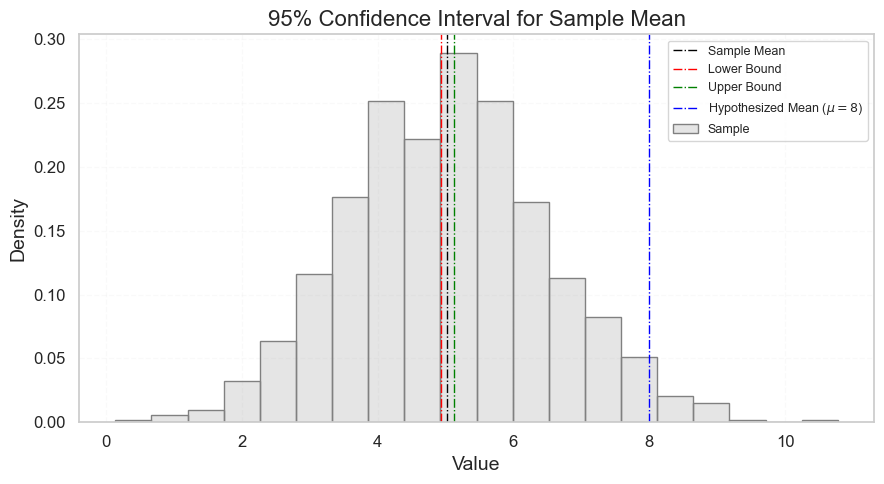

In [118]:
sns.set(style='whitegrid', palette='deep')
plt.figure(figsize=(9, 5))
sns.histplot(sample, bins=20, stat="density", color='grey', edgecolor='grey', alpha=0.2, label='Sample')
plt.axvline(np.mean(sample), color='black', linestyle='-.', linewidth=1, label="Sample Mean")
plt.axvline(confidence_interval[0], color='red', linestyle='-.', linewidth=1, label="Lower Bound")
plt.axvline(confidence_interval[1], color='green', linestyle='-.', linewidth=1, label="Upper Bound")
plt.axvline(mu_0, color='blue', linestyle='-.', linewidth=1, label="Hypothesized Mean ($\mu = 8$)")
plt.title("95% Confidence Interval for Sample Mean", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.1)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


On this plot, you would see the blue line (8) way to the right, far outside the cluster of data and beyond the confidence bounds. This visual reinforces that 8 is not a plausible value for the true mean given our sample.(Formally, Because 8 is not in the 95% confidence interval, it immediately tells us that a hypothesis test at the 5% level would reject $H_0: \mu=8$. ) This is exactly what we found with $T_n$ and p-value. The confidence interval approach and the test are two sides of the same coin.

## Statistics (final recap)

Consider the task of estimating the average number of Instagram followers among all NYU students. This will help clarify the roles of population, sample, estimator, etc., which are crucial in any inference. 


1. **Population Parameter ($\mu_x$)**: The unknown true average number of Instagram followers for all NYU students.
   
2. **Population**: The entire group of NYU students, which is too large to fully survey in most cases.

3. **Sample**: A smaller group of students selected from the population to gather data on their Instagram followers.

4. **Estimator**: The sample average, denoted by $ \overline{X_n} $, which serves as an estimate of the population parameter $ \mu_x $.

5. **Estimate**: The specific value of the sample average, such as $ \overline{x_A} $ for Student A’s sample or $ \overline{x_B} $ for Student B’s sample.

6. **Random Variable**: The estimator $ \overline{X_n} $ is a random variable because its value depends on the sample chosen, and different samples will yield different estimates.


>  Things to Consider:
- **How should we choose the sample?** – We should select sample randomly from the entire target population rather than, for example, from a single friend group. The sampling method matters: a biased sample yields a biased estimate.

- **What would happen if we only interviewed our NYU Instagram followers as our sample?**– That would likely bias the results! If I only ask my followers, I might oversample people similar to me, or those who even know me (maybe they have similar social media habits). This wouldn’t be representative of all NYU. It’s a caution against convenience sampling.

- **How many students do we need to survey for a reliable sample?** – Generally, more is better (law of large numbers). A larger sample reduces the variance of our estimator (the distribution of $\overline{X}_n$ gets narrower). But larger samples cost more time/money, so there’s a trade-off. Using formulas, we could determine a reasonable sample size for a desired confidence interval width, for example.

Now, imagine each of us takes a sample and calculates the average number of Instagram followers. For example, Student A selects a sample and computes an average, denoted $ \overline{x_A} $, which we refer to as an **estimate**. However, if Student B had taken a different sample, their estimate $ \overline{x_B} $ would likely be different, because the estimator $ \overline{X_n} $ is a **random variable**, as its value depends on the specific sample chosen.


Let's suppose that our best estimator from all the available options in the classroom is given by

$$
\bar{x}_n = \frac{1}{n} \sum_{i=1}^{n} x_i = 250
$$

$$
\sigma^2_{\bar{x}} = \frac{\sigma^2_x}{n} = 2500
$$


Now, imagine a student claims to be quite popular with 100 Instagram followers. However, our sample estimate indicates that the average number of followers is 250. The student might chuckle and argue that the true population average $\mu_x$ is actually 150.

This is a classic scenario for a hypothesis test: We have a claim ($\mu_x = 150$) to test against our evidence (our sample average was 250). We can’t prove the student is wrong with absolute certainty (because there’s always a chance our sample was an odd one), but we can assess how likely such a big difference would occur if the student’s claim were true.

Let’s set it up:
**Hypotheses**:
- $H_0$: The true mean number of followers is 150.
- $H_1$: The true mean number of followers is not 150.
We’ll conduct this at, say, $\alpha = 0.05$ significance.

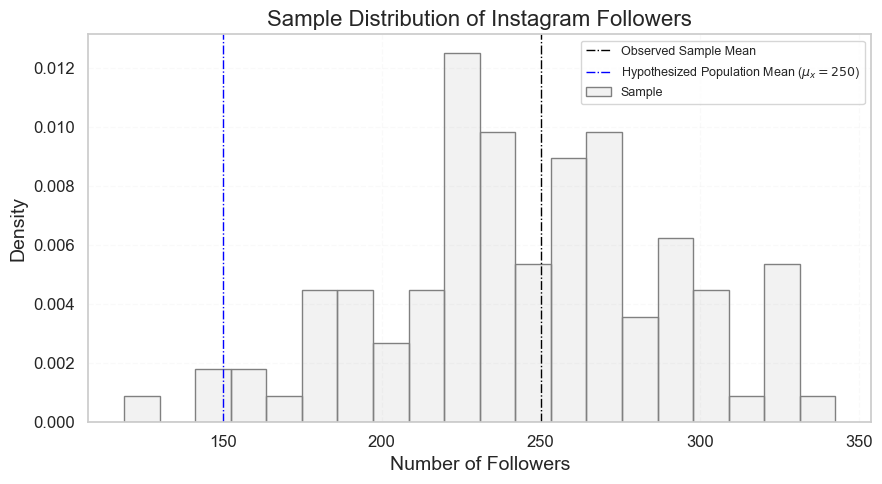

In [119]:
# Parameters
sample_mean = 250
std_dev = 50
sample_size = 100
mu_x = 150

# Simulating sample data
np.random.seed(42)
sample = np.random.normal(loc=sample_mean, scale=std_dev, size=sample_size)

# Plotting
sns.set(style='whitegrid', palette='deep')
plt.figure(figsize=(9, 5))
sns.histplot(sample, bins=20, stat="density", color='grey', edgecolor='grey', alpha=0.1, label='Sample')
plt.axvline(sample_mean, color='black', linestyle='-.', linewidth=1, label="Observed Sample Mean")
plt.axvline(mu_x, color='blue', linestyle='-.', linewidth=1, label="Hypothesized Population Mean ($\mu_x = 250$)")
plt.title("Sample Distribution of Instagram Followers", fontsize=16)
plt.xlabel("Number of Followers", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.1)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


In [120]:
T_n = compute_test_statistic(sample_mean, std_dev, mu_x)
display(Math(f"T_n: {T_n}"))


<IPython.core.display.Math object>

In [121]:
p_value = compute_p_value(T_n)
display(Math(f"\\hat p_n = {round(p_value, 10)}"))

<IPython.core.display.Math object>

Given these results, we can:

- **Reject the Null Hypothesis**: The data provides very strong evidence against the null hypothesis ($H_0: \mu = 150$). This means that it is highly unlikely that the true population mean is \(150\). There is strong evidence to suggest that the true population mean is significantly higher than \(150\).

## Experiments

Suppose we want to measure the effect of a job training program (let’s call this treatment $S$ for skill training) on people’s wages (outcome $Y$). In other words, does participating in this training program actually increase one’s wage?

Imagine the government conducts a survey asking a bunch of households whether they have participated in any job training programs (through libraries or other resources) and also collects their income data.

So we end up with observational data: we know who chose to join a training program and what their wages are. Perhaps we compare:
- The average wage of those who did the training ($S=1$) vs.
- The average wage of those who did not do the training ($S=0$).

**Question:** Can we treat the difference in those average wages as the causal effect of the training program?

Intuitively, you might suspect a problem: People who took the training might be systematically different from those who didn’t. For example, maybe unemployed people or those with lower initial skills are more likely to enroll in the free training (hoping to improve their prospects). Those individuals might have lower wages to begin with. Meanwhile, people with higher education or better jobs might feel they don’t need extra training. If that’s the case, when we just compare the groups, we could be confounding the effect of the program with pre-existing differences in the groups.

Let’s visualize this in an observational setting using a Directed Acyclic Graph (DAG), where our outcome of interest is wage (\(Y\)).

In [122]:
import networkx as nx

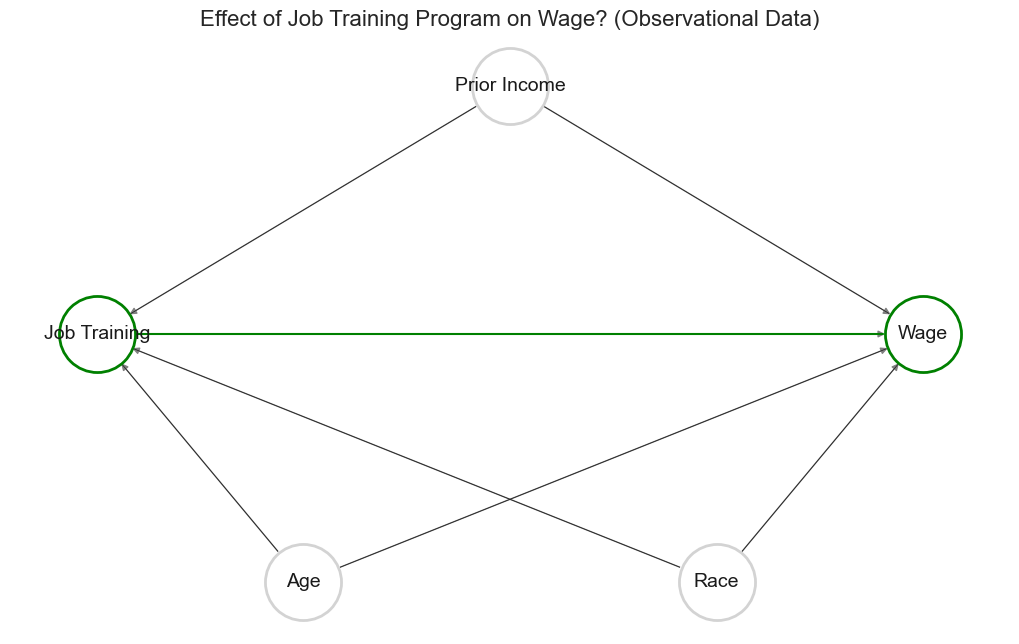

In [123]:


G = nx.DiGraph()

edges = [
    ('Job Training', 'Wage'),
    ('Age', 'Job Training'),
    ('Age', 'Wage'),
    ('Race', 'Job Training'),
    ('Race', 'Wage'),
    ('Prior Income', 'Job Training'),
    ('Prior Income', 'Wage'),
]

G.add_edges_from(edges)

pos = {
    'Job Training': (1, 2),
    'Wage': (5, 2),
    'Age': (2, 1),
    'Race': (4, 1),
    'Prior Income': (3, 3)
}
node_colors = ['white' for _ in G.nodes()]
outline_colors = ['green' if node in ['Wage', 'Job Training'] else 'lightgray' for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color=node_colors, font_size=14, edge_color='gray', linewidths=2)

for node, color in zip(G.nodes(), outline_colors):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='white', edgecolors=color, linewidths=2, node_size=3000)

for edge in edges:
    if edge == ('Job Training', 'Wage'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=1.5, edge_color='green')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=0.5)

plt.title('Effect of Job Training Program on Wage? (Observational Data)', fontsize=16)
plt.gca().set_facecolor('whitesmoke')
plt.axis('off')  # Turn off the axis
plt.grid(False)  # Turn off grid
plt.show()



Here:

- Here, we draw nodes for $S$ (job training), $Y$ (wages), and $U$ (the other factors like age/prior income).
- The arrow from $ U $ to $ S $ indicates that individuals with lower prior wages are more likely to enroll in job training programs.
- $ U $ affects $ Y $ because education and experience are key determinants of wages.
- Participation in the job training program ($ S $) directly influences wages ($ Y $), as the training may enhance skills and lead to higher income.

This forms a confounding triangle: $S$ and $Y$ have a common cause $U$

This makes it difficult to separate the true impact of the training ($ S $) from the influence of the confounding factors ($ U $).

In our example, it might actually happen that when you crunch the survey numbers, the average wage of people who took the training is lower than the average wage of people who didn’t. This could happen if, say, a lot of low-wage workers joined the program and many high-wage workers didn’t need it. The raw comparison would then make the training look ineffective or even harmful (“people who trained earn less than people who didn’t!”)

$$ \mathbb{E}[Y(S = 1, U)|S = 1] < \mathbb{E}[Y(S = 1, U)], $$

To address this issue, we use randomized controlled trials (RCTs) to isolate the effect of the training. By randomizing treatment assignment, and assuming:
 + Perfect compliance: People do what they are told in the experiment. 

 + SUTVA Roughly means there’s no interference between individuals and only one version of the treatment. 

we ensure $ S \perp U $.

**Note, while $ S $ still directly affects $ Y $, and $ U $ continues to influence $ Y $ (since factors like education and experience impact wages), $ U $ no longer has any effect on $ S $.**




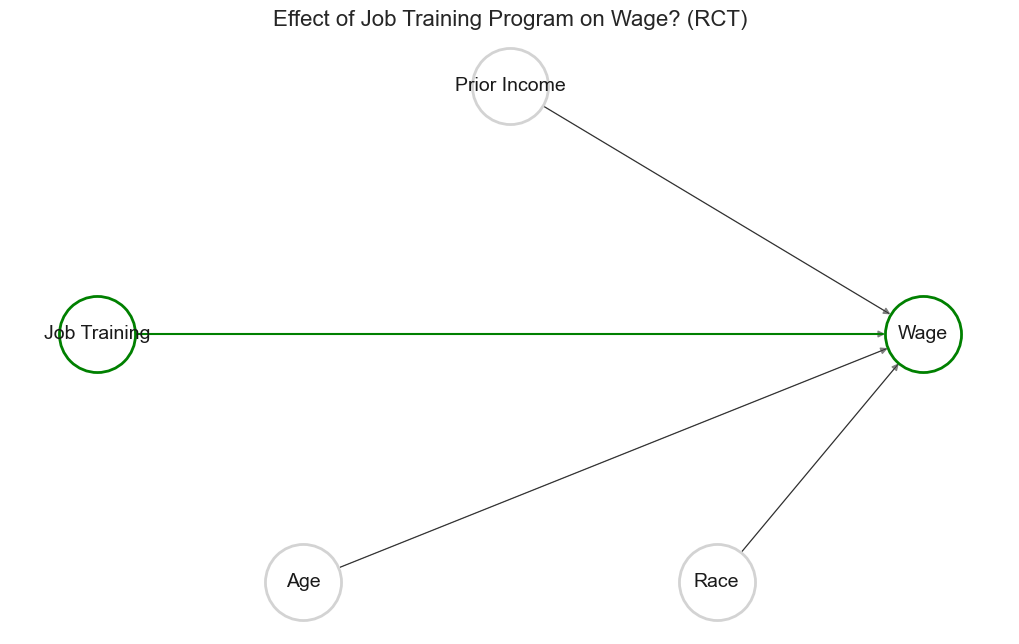

In [124]:
G = nx.DiGraph()

edges = [
    ('Job Training', 'Wage'),
    ('Age', 'Wage'),
    ('Race', 'Wage'),
    ('Prior Income', 'Wage'),
]

G.add_edges_from(edges)

pos = {
    'Job Training': (1, 2),
    'Wage': (5, 2),
    'Age': (2, 1),
    'Race': (4, 1),
    'Prior Income': (3, 3)
}
node_colors = ['white' for _ in G.nodes()]
outline_colors = ['green' if node in ['Wage', 'Job Training'] else 'lightgray' for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color=node_colors, font_size=14, edge_color='gray', linewidths=2)

for node, color in zip(G.nodes(), outline_colors):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='white', edgecolors=color, linewidths=2, node_size=3000)

for edge in edges:
    if edge == ('Job Training', 'Wage'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=1.5, edge_color='green')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=0.5)

plt.title('Effect of Job Training Program on Wage? (RCT)', fontsize=16)
plt.gca().set_facecolor('whitesmoke')
plt.axis('off')  # Turn off the axis
plt.grid(False)  # Turn off grid
plt.show()

Assuming those, randomization makes the groups comparable. In the DAG, under randomization:
- We remove the arrow $U \to S$. $U$ no longer influences who gets $S$ because we (the experimenters) decided who gets $S$ randomly.
- We still have $U \to Y$ (because even in an experiment, factors like education still affect someone’s wage – we can’t remove that).
- And we have $S \to Y$ (if the training truly has an effect).

$S$ is now independent of $U$. There’s no confounding path connecting $S$ and $Y$ aside from $S$ itself affecting $Y$. So we have:

- The average outcome in the treatment group is equal to that of the overall population receiving treatment:
  
  $$
  E[Y(S = 1, U) | S = 1] = E[Y(S = 1, U)].
  $$

- The average outcome in the control group matches that of the overall population without treatment:
  
  $$
  E[Y(S = 0, U) | S = 0] = E[Y(S = 0, U)].
  $$

This implies that, despite the fundamental problem of causal inference, we can estimate the Average Treatment Effect (ATE) since there are no systematic differences between groups. Thus, we can express the ATE as:
  
$$
ATE = E[Y(S = 1, U) | S = 1] - E[Y(S = 0, U) | S = 0].
$$


## Path Forward

- Next time, we will:
  - Focus on the final step in answering causal questions: estimation.
  - Explore what happens when we relax the assumptions of:
    - Perfect compliance
    - SUTVA

---

**References:**


[^1]: Lalonde, R. J. (1986). *Evaluating the Econometric Evaluations of Training Programs with Experimental Data.* American Economic Review, 76(4), 604-620.
